[View in Colaboratory](https://colab.research.google.com/github/sametdumankaya/TensorflowDeepLearning/blob/master/imdb_classification.ipynb)

In [0]:
# Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load data and limit total number of words included in data

num_words = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)

In [0]:
# Convert movie reviews to one-hot encoded matrices

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [0]:
# Create neural network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(num_words,)))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile network

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# Train model

history = model.fit(x_train,
                      y_train,
                      epochs=6,
                      batch_size=128,
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 5s 184us/step - loss: 0.3342 - acc: 0.8641 - val_loss: 0.2986 - val_acc: 0.8791
Epoch 2/6
25000/25000 [==============================] - 4s 145us/step - loss: 0.1868 - acc: 0.9313 - val_loss: 0.3167 - val_acc: 0.8757
Epoch 3/6
25000/25000 [==============================] - 4s 147us/step - loss: 0.1381 - acc: 0.9512 - val_loss: 0.3641 - val_acc: 0.8686
Epoch 4/6
25000/25000 [==============================] - 4s 144us/step - loss: 0.1039 - acc: 0.9625 - val_loss: 0.4119 - val_acc: 0.8625
Epoch 5/6
25000/25000 [==============================] - 4s 146us/step - loss: 0.0697 - acc: 0.9769 - val_loss: 0.4996 - val_acc: 0.8546
Epoch 6/6
 5376/25000 [=====>........................] - ETA: 1s - loss: 0.0355 - acc: 0.9903

25000/25000 [==============================] - 4s 144us/step - loss: 0.0413 - acc: 0.9884 - val_loss: 0.5640 - val_acc: 0.8558


In [7]:
# Print test results

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 3s 126us/step
Test loss: 0.5640091001844406
Test accuracy: 0.85576


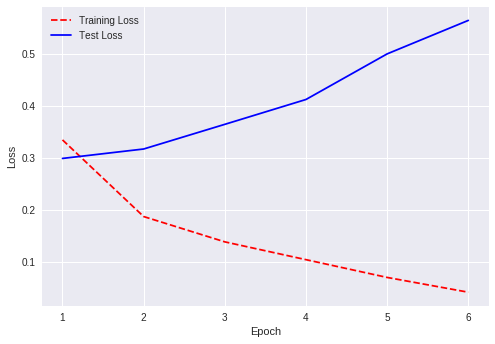

In [8]:
# Visualize loss history

training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();